In [ ]:
# !pip install matplotlib
# !pip install transformers
# !pip install emoji
# !pip install tensorflow
# !pip install torch
# !pip install tqdm
# !pip install spacy==3.7.2 cymem preshed murmurhash
# !pip install pyabsa
# !pip install flair
# !pip install hf_xet
# !pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --------------------------------------- 626.3/626.3 kB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 19.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib
# import tensorflow
from tqdm import tqdm
import torch
import pandas as pd
import re
from transformers import pipeline
import emoji
from textblob import TextBlob


In [2]:
df_same=pd.read_json('../data/raw/reviews_same.jsonl',lines=True) # for same product

In [3]:
print("Number of Products: ",len(df_same.product_id.unique()))

Number of Products:  50


<Axes: xlabel='product_id'>

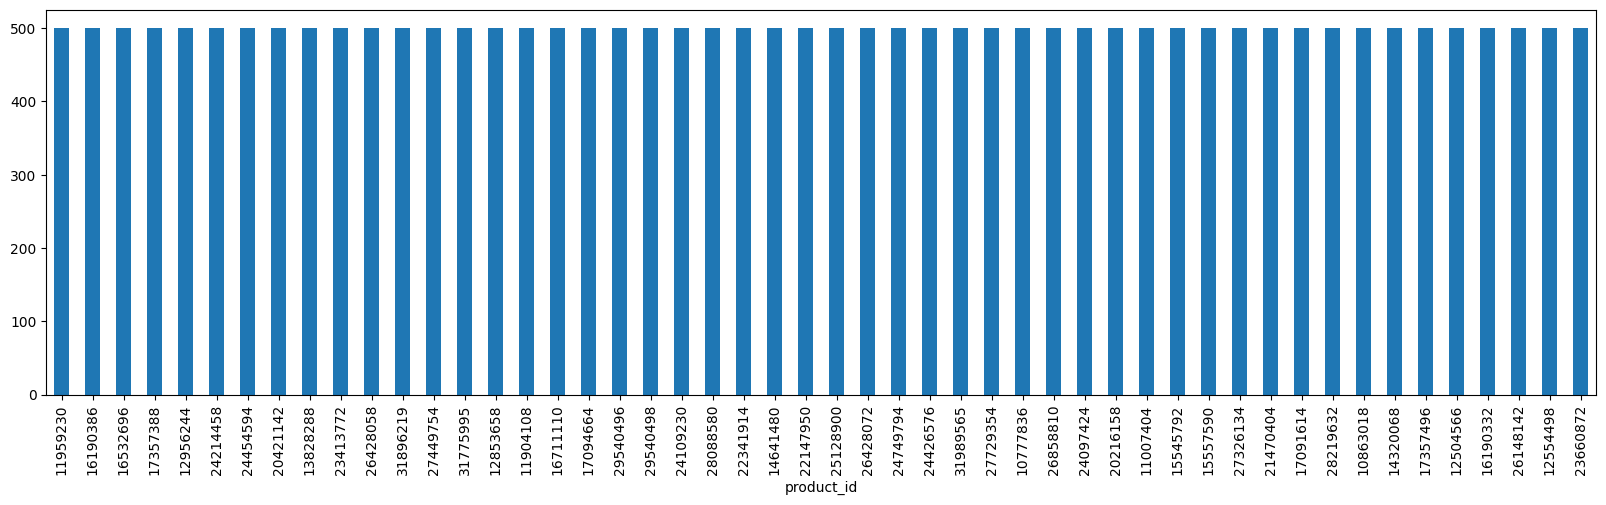

In [4]:
df_same.product_id.value_counts().plot(kind='bar',figsize=(20,5))

In [5]:
df_same.head()

,product_id,review,brand_name,product_details
0,11959230,"Excellent Purchase!❤️❤️❤️❤️❤️\n\n\n""I'm thrill...",Roadster,Men Green Solid Hooded Sweatshirt
1,11959230,"""I recently bought the Roadster Textured Hoodi...",Roadster,Men Green Solid Hooded Sweatshirt
2,11959230,"Superb quality and material, you must buy\nI j...",Roadster,Men Green Solid Hooded Sweatshirt
3,11959230,"The design is simple yet stylish, making it ea...",Roadster,Men Green Solid Hooded Sweatshirt
4,11959230,This product stands out for its exceptional qu...,Roadster,Men Green Solid Hooded Sweatshirt


In [6]:
for i in df_same.review.head():
    print(i,"\n================================================================")

Excellent Purchase!❤️❤️❤️❤️❤️


"I'm thrilled with my Roadster Navy Blue Hooded Sweatshirt (Size X'S)!

Pros:-----

- Soft, comfortable fabric
- Perfect fit (true to size)
- Stylish navy blue color
- Hood adds extra warmth and style
- Quick delivery, well-packaged

Quality and Comfort:-----

Roadster's sweatshirt exceeded expectations! The material is breathable, lightweight, and cozy. Ideal for casual wear.

Rating:  ----- 5/5


Would I recommend?  -----     Absolutely! 
"I recently bought the Roadster Textured Hoodie Sweatshirt from Myntra, and I’m really impressed! The textured design adds a stylish and unique touch, making it stand out from regular hoodies. The fit is perfect—comfortable yet well-fitted, providing a cozy feel without being too bulky. The fabric is soft, warm, and of excellent quality, making it ideal for cooler days. Plus, it’s super affordable, offering great value for money. If you’re looking for a trendy, comfortable, and high-quality hoodie, this one is definit

# Cleaning the data

In [7]:

emoji_sentiment = {
    '😍': ' positive_emoji ',
    '😊': ' positive_emoji ',
    '😃': ' positive_emoji ',
    '😁': ' positive_emoji ',
    '👍': ' positive_emoji ',
    '🔥': ' positive_emoji ',
    '💯': ' positive_emoji ',
    '🥰': ' positive_emoji ',
    '😢': ' negative_emoji ',
    '😡': ' negative_emoji ',
    '👎': ' negative_emoji ',
    '😠': ' negative_emoji ',
    '🤮': ' negative_emoji ',
    '😤': ' negative_emoji ',
    '😞': ' negative_emoji ',
    '❤️': ' positive_emoji ',
    '💖': ' positive_emoji ',
    '💘': ' positive_emoji ',
    '💗': ' positive_emoji ',
    '💓': ' positive_emoji ',
    '💞': ' positive_emoji ',
    '💟': ' positive_emoji ',
    '🧡': ' positive_emoji ',
    '💛': ' positive_emoji ',
    '💚': ' positive_emoji ',
    '💙': ' positive_emoji ',
    '💜': ' positive_emoji ',
    '🖤': ' positive_emoji ',
    '🤍': ' positive_emoji ',
    '🤎': ' positive_emoji ',
}


In [8]:
def replace_emojis(text):
    if not isinstance(text, str):
        return ""
    for emo, replacement in emoji_sentiment.items():
        text = text.replace(emo, replacement)
    return text

In [9]:
def clean_review_with_emojis(text):
    if not isinstance(text, str):
        return ""
    
    text = replace_emojis(text)  # keep useful emoji context
    
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)          # remove URLs
    text = re.sub(r"<.*?>", "", text)                   # remove HTML
    text = re.sub(r"[^a-zA-Z0-9\s.,!?_]", "", text)     # keep underscore in label
    text = re.sub(r"\s+", " ", text).strip()            # normalize whitespace
    return text


In [10]:
def clean_review(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)          # remove URLs
    text = re.sub(r"<.*?>", "", text)                   # remove HTML
    text = re.sub(r"[^a-zA-Z0-9\s.,!?]", "", text)      # remove special characters
    text = re.sub(r"\s+", " ", text).strip()            # remove extra whitespace
    return text

In [11]:
clean_review_with_emojis(df_same.review[0])

'excellent purchase! positive_emoji positive_emoji positive_emoji positive_emoji positive_emoji im thrilled with my roadster navy blue hooded sweatshirt size xs! pros soft, comfortable fabric perfect fit true to size stylish navy blue color hood adds extra warmth and style quick delivery, wellpackaged quality and comfort roadsters sweatshirt exceeded expectations! the material is breathable, lightweight, and cozy. ideal for casual wear. rating 55 would i recommend? absolutely!'

In [12]:
clean_review(df_same.review[0])

'excellent purchase! im thrilled with my roadster navy blue hooded sweatshirt size xs! pros soft, comfortable fabric perfect fit true to size stylish navy blue color hood adds extra warmth and style quick delivery, wellpackaged quality and comfort roadsters sweatshirt exceeded expectations! the material is breathable, lightweight, and cozy. ideal for casual wear. rating 55 would i recommend? absolutely!'

In [13]:
df_same['cleaned_review_without_emoji'] = df_same['review'].apply(clean_review)
df_same['cleaned_review_with_emoji'] = df_same['review'].apply(clean_review_with_emojis)

In [14]:
df_same.shape

(25000, 6)

In [15]:
df_same[df_same['cleaned_review_with_emoji'].str.strip() != ""].shape

(24988, 6)

In [16]:
df_same[df_same['cleaned_review_with_emoji'].str.strip() == ""]

,product_id,review,brand_name,product_details,cleaned_review_without_emoji,cleaned_review_with_emoji
3499,26858810,,NOBERO,Graphic Printed Oversized T-shirt,,
4834,11007404,\n,Mast & Harbour,Men Blue & White Regular Fit Checked Casual Shirt,,
11952,24749794,\n,Mast & Harbour,Men Standard Opaque Checked Casual Shirt,,
16998,13828288,,INVICTUS,Men Easy Care Grey & Black Self Design Sustai...,,
17308,23413772,,Mast & Harbour,Men Standard Opaque Casual Pure Cotton Shirt,,
17339,23413772,\n,Mast & Harbour,Men Standard Opaque Casual Pure Cotton Shirt,,
17340,23413772,\n,Mast & Harbour,Men Standard Opaque Casual Pure Cotton Shirt,,
17440,23413772,,Mast & Harbour,Men Standard Opaque Casual Pure Cotton Shirt,,
20912,16711110,,The Indian Garage Co,Men Yellow & White Horizontal Striped Pure Cot...,,
20920,16711110,,The Indian Garage Co,Men Yellow & White Horizontal Striped Pure Cot...,,


In [17]:
df_same = df_same[df_same['cleaned_review_with_emoji'].str.strip() != ""]  # remove empty ones
df_same.shape

(24988, 6)

# Sentiment Analysis

In [18]:
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

d:\NLP assignment\NLP_Project\venv\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\praja\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [30]:
def get_sentiment_label(text):
    try:
        result = sentiment_pipeline(text[:512])[0]  # Truncate long reviews
        return int(result['label'][0])
    except:
        return "error"

In [31]:
get_sentiment_label(df_same['cleaned_review_with_emoji'][20])

3

In [32]:
df_same['sentiment_emoji']=df_same['cleaned_review_with_emoji'].apply(get_sentiment_label)
df_same['sentiment']=df_same['cleaned_review_without_emoji'].apply(get_sentiment_label)

In [45]:
df_same['sentiment_label_emoji'] = df_same['sentiment_emoji'].apply(lambda x: 'positive' if x > 3 else ('neutral' if x == 3 else 'negative'))
df_same['sentiment_label'] = df_same['sentiment'].apply(lambda x: 'positive' if x > 3 else ('neutral' if x == 3 else 'negative'))

In [61]:
new_df=pd.get_dummies(df_same[['sentiment_label_emoji','sentiment_label']]).set_index(df_same.product_id).reset_index()

In [65]:
product_recommend=new_df.groupby('product_id').sum()

In [69]:
product_recommend['recommend']=product_recommend.sentiment_label_positive.apply(lambda x:True if x>350 else False)

In [70]:
product_recommend

,sentiment_label_emoji_negative,sentiment_label_emoji_neutral,sentiment_label_emoji_positive,sentiment_label_negative,sentiment_label_neutral,sentiment_label_positive,recommend
product_id,,,,,,,
10777836,20,57,423,20,57,423,True
10863018,22,38,440,22,39,439,True
11007404,23,42,434,23,42,434,True
11904108,15,59,426,15,59,426,True
11959230,19,70,411,19,69,412,True
12504566,18,37,445,19,36,445,True
12554498,20,57,423,20,57,423,True
12853658,20,41,439,21,40,439,True
12956244,22,35,443,22,35,443,True


In [75]:
df_same.head()

,product_id,review,brand_name,product_details,cleaned_review_without_emoji,cleaned_review_with_emoji,sentiment_emoji,sentiment,sentiment_label_emoji,sentiment_label
0,11959230,"Excellent Purchase!❤️❤️❤️❤️❤️\n\n\n""I'm thrill...",Roadster,Men Green Solid Hooded Sweatshirt,excellent purchase! im thrilled with my roadst...,excellent purchase! positive_emoji positive_em...,5,5,positive,positive
1,11959230,"""I recently bought the Roadster Textured Hoodi...",Roadster,Men Green Solid Hooded Sweatshirt,i recently bought the roadster textured hoodie...,i recently bought the roadster textured hoodie...,5,5,positive,positive
2,11959230,"Superb quality and material, you must buy\nI j...",Roadster,Men Green Solid Hooded Sweatshirt,"superb quality and material, you must buy i ju...","superb quality and material, you must buy i ju...",5,5,positive,positive
3,11959230,"The design is simple yet stylish, making it ea...",Roadster,Men Green Solid Hooded Sweatshirt,"the design is simple yet stylish, making it ea...","the design is simple yet stylish, making it ea...",5,5,positive,positive
4,11959230,This product stands out for its exceptional qu...,Roadster,Men Green Solid Hooded Sweatshirt,this product stands out for its exceptional qu...,this product stands out for its exceptional qu...,5,5,positive,positive


In [73]:
df_same.to_csv('../data/processed/reviews_same.csv',index=False)

# Aspect-Based Sentiment Analysis

In [82]:
# from transformers import pipeline

# Load zero-shot classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define product review and candidate aspects
review = "The screen is really sharp but the battery drains too fast."
aspects = ["screen", "battery", "camera", "performance", "design"]

# Classify aspects mentioned in the review
result = classifier(review, aspects, multi_label=True)

# Print results
for label, score in zip(result['labels'], result['scores']):
    print(f"Aspect: {label} | Confidence: {score:.2f}")


d:\NLP assignment\NLP_Project\venv\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\praja\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP

Aspect: screen | Confidence: 0.99
Aspect: performance | Confidence: 0.91
Aspect: battery | Confidence: 0.34
Aspect: design | Confidence: 0.04
Aspect: camera | Confidence: 0.00


In [98]:
import json

In [106]:
def write_jsonl_line(data):
    path='../data/raw/top20_product_aspect.jsonl'
    with open(path, 'a', encoding='utf-8') as f:
        json.dump(data, f)
        f.write('\n')

In [107]:
def get_aspect_sentiment(text, aspects=aspects):
    sentiment_overall = TextBlob(text).sentiment.polarity
    result = classifier(text, aspects, multi_label=True)
    aspect_sentiments = {}

    for label, score in zip(result['labels'], result['scores']):
        if label in text.lower():  # ensure aspect is mentioned
            aspect_sentiments[label]= "positive" if sentiment_overall > 0 else "negative"
    return aspect_sentiments

# Example
review = df_same['cleaned_review_without_emoji'][0]
aspects = [
        'fit', 'size', 'fabric', 'color', 'comfort', 'style', 'design', 'stitching',
        'softness', 'durability', 'washability', 'shrinkage', 'price', 'value',
        'brand', 'packaging', 'sleeve', 'collar', 'neckline', 'length',
        'waist', 'stretch', 'pockets', 'zippers', 'buttons', 'sole',
        'grip', 'warmth', 'hood', 'elasticity', 'tightness', 'looseness'
    ]
print(get_aspect_sentiment(review))

{'fit': 'positive', 'style': 'positive', 'fabric': 'positive', 'comfort': 'positive', 'color': 'positive', 'hood': 'positive', 'warmth': 'positive', 'size': 'positive'}


In [100]:
write_jsonl_line(get_aspect_sentiment(review))

In [108]:
count=0
for i in tqdm(df_same.cleaned_review_with_emoji):
    if count==20:
        break
    # print(i)
    write_jsonl_line(get_aspect_sentiment(i))
    count+=1

  0%|          | 20/24988 [03:26<71:28:27, 10.31s/it]
